In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Basecamp = automap_base()
Basecamp.prepare(engine, reflect=True)
# reflect the tables
Basecamp.prepare(autoload_with=engine)

C:\Users\Raysh\AppData\Local\Temp\ipykernel_9812\2097009484.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Basecamp.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Basecamp.classes.keys() # I could have used the .get_table_names

['station', 'measurement']

In [8]:
# Save references to each table
measurement = Basecamp.classes.measurement
station  = Basecamp.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(recent_date)

('2017-08-23',)


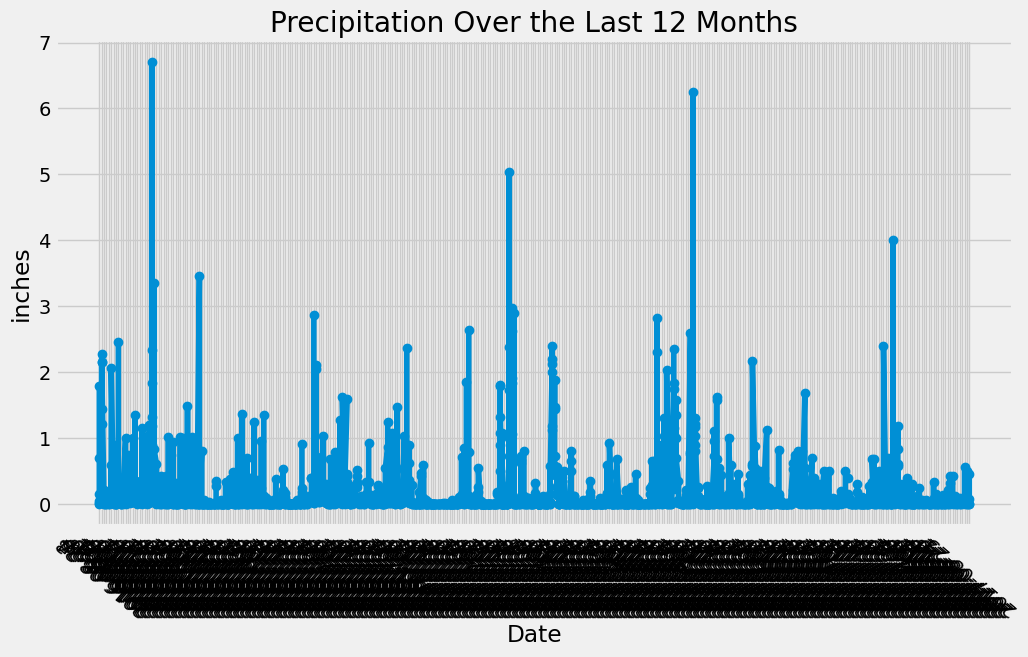

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
with engine.connect() as conn:
    # Get the most recent date in the dataset
   # recent_date_query = conn.execute(text ("SELECT MAX(date) FROM measurement")).fetchone()
   #recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
    recent_date1 = pd.to_datetime(recent_date)
    
# Calculate the date one year from the last date in data set.
last_date = recent_date1
past_year = last_date - dt.timedelta(days=365)

# Convert past_year to a string in the format 'YYYY-MM-DD'
past_year_str = past_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= past_year_str).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=["date","prcp"]) 

# Sort the dataframe by date
precipitation_df.sort_values(by="date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(11, 6))
plt.plot(precipitation_df['date'], precipitation_df['prcp'], marker='o')
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('inches')
plt.xticks(rotation=500)
plt.show()

In [57]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.rename(columns={'precipitation':'prcp'})

precipitation_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number of stations in the dataset
with engine.connect() as conn:
    station_query = text("""
        SELECT station, COUNT(*) as observation_count
        FROM measurement
        GROUP BY station
        ORDER BY observation_count DESC
        LIMIT 1
    """)

station_result = conn.execute(station_query).fetchone()
station_id = station_result[0]

NameError: name 'text' is not defined

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

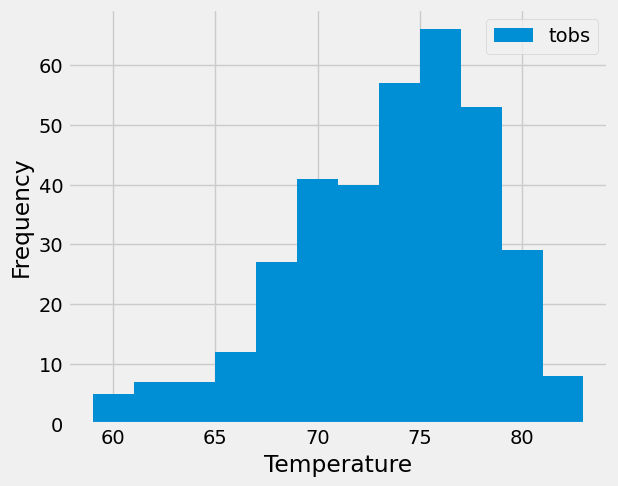

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()